# Analyzing time series with Pandas

## Dataset
We will use a sample dataset for occupancy detection: http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

First we download the dataset into the `./data` directory.

Note: more datasets can be found here: https://machinelearningmastery.com/time-series-datasets-for-machine-learning/

In [129]:
!pip -q install "dask[complete]" pyarrow 
!wget -q http://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip -O occupancy_data.zip
!unzip -qq -o occupancy_data.zip -d data
!ls -al ./data
!head ./data/datatraining.txt

     |████████████████████████████████| 48.5MB 1.3MB/s 
total 1476
drwxr-xr-x 2 root root   4096 May  3 07:47 .
drwxr-xr-x 1 root root   4096 May  3 06:15 ..
-rw-r--r-- 1 root root 699664 Jan  5  2016 datatest2.txt
-rw-r--r-- 1 root root 200766 Jan  5  2016 datatest.txt
-rw-r--r-- 1 root root 596674 Jan  5  2016 datatraining.txt
"date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"
"1","2015-02-04 17:51:00",23.18,27.272,426,721.25,0.00479298817650529,1
"2","2015-02-04 17:51:59",23.15,27.2675,429.5,714,0.00478344094931065,1
"3","2015-02-04 17:53:00",23.15,27.245,426,713.5,0.00477946352442199,1
"4","2015-02-04 17:54:00",23.15,27.2,426,708.25,0.00477150882608175,1
"5","2015-02-04 17:55:00",23.1,27.2,426,704.5,0.00475699293331518,1
"6","2015-02-04 17:55:59",23.1,27.2,419,701,0.00475699293331518,1
"7","2015-02-04 17:57:00",23.1,27.2,419,701.666666666667,0.00475699293331518,1
"8","2015-02-04 17:57:59",23.1,27.2,419,699,0.00475699293331518,1
"9","2015-02-04 17:58:59",23.1,

In [130]:
import pandas as pd
import dask
import dask.dataframe as dd
import numpy as np
#import datetime

#dateparser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')  #https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
#df = pd.read_csv("./data/datatraining.txt", converters={'date':dateparser}); df.set_index('date',inplace=True,verify_integrity=True)

desired_dtypes={
       'Temperature':np.float32,
       'Humidity':np.float32,
       'Light':np.float32,
       'CO2':np.float32,
       'HumidityRatio':np.float32,
       'Occupancy':np.uint8
}

pdf = pd.read_csv("./data/datatraining.txt",dtype=desired_dtypes, converters={'date':pd.to_datetime})
pdf.set_index('date',inplace=True,verify_integrity=True)

print(pdf.info())
pdf.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8143 entries, 2015-02-04 17:51:00 to 2015-02-10 09:33:00
Data columns (total 6 columns):
Temperature      8143 non-null float32
Humidity         8143 non-null float32
Light            8143 non-null float32
CO2              8143 non-null float32
HumidityRatio    8143 non-null float32
Occupancy        8143 non-null uint8
dtypes: float32(5), uint8(1)
memory usage: 230.6 KB
None


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.271999,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.267500,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.245001,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.200001,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.200001,426.0,704.50,0.004757,1


In [131]:
ddf = dd.read_csv('./data/*.txt',dtype=desired_dtypes,converters={'date':pd.to_datetime}).set_index('date') # use dask for multiple files
ddf.index # make sure it is indeed a DatetimeIndex

Dask Index Structure:
npartitions=3
2015-02-02 14:19:00.000000000    datetime64[ns]
2015-02-06 20:44:14.750000128               ...
2015-02-12 23:18:12.000000000               ...
2015-02-18 09:19:00.000000000               ...
Name: date, dtype: datetime64[ns]
Dask Name: sort_index, 35 tasks

In [112]:
pdf = ddf.compute()
print(pdf.info())
pdf.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20560 entries, 2015-02-02 14:19:00 to 2015-02-18 09:19:00
Data columns (total 6 columns):
Temperature      20560 non-null float16
Humidity         20560 non-null float16
Light            20560 non-null float16
CO2              20560 non-null float16
HumidityRatio    20560 non-null float16
Occupancy        20560 non-null uint8
dtypes: float16(5), uint8(1)
memory usage: 381.5 KB
None


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.703125,26.265625,585.00,749.0,0.004765,1
2015-02-02 14:19:59,23.718750,26.296875,578.50,760.5,0.004772,1
2015-02-02 14:21:00,23.734375,26.234375,572.50,769.5,0.004765,1
2015-02-02 14:22:00,23.718750,26.125000,493.75,775.0,0.004745,1
2015-02-02 14:23:00,23.750000,26.203125,488.50,779.0,0.004768,1


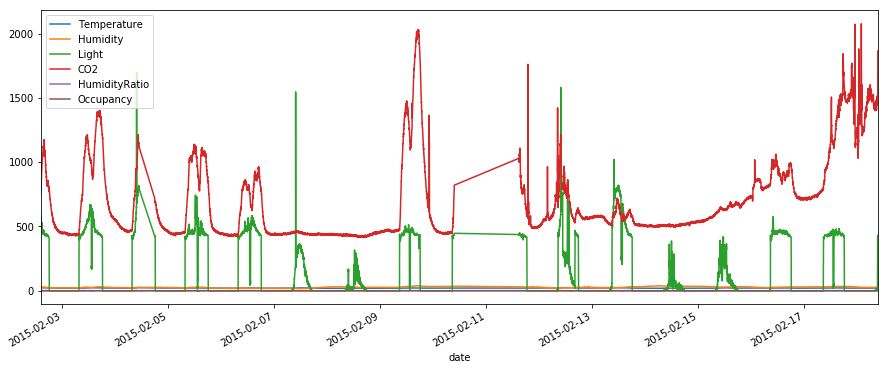

In [113]:
pdf.plot(figsize=(15, 6))

Because of the different scale of the quantities, we can't inspect them visually. We can use a log plot.

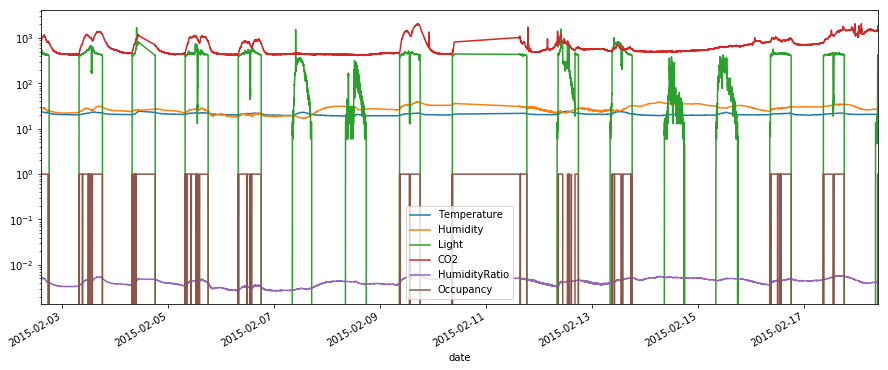

In [114]:
pdf.plot(figsize=(15, 6),logy=True)

Or we can scale the quantities

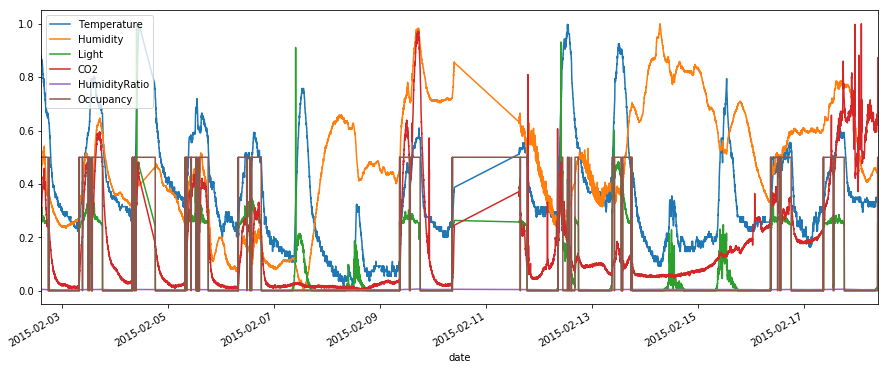

In [117]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

columns_to_normalize = ['CO2','Light','Humidity','Temperature']
for c in columns_to_normalize:
  x = pdf[[c]].values.astype(float)
  scaled = mms.fit_transform(x)
  pdf[c] = scaled

pdf['Occupancy'] *= 0.5
pdf.plot(figsize=(15, 6))

Looks like too much info? You can plot individual columns as well.

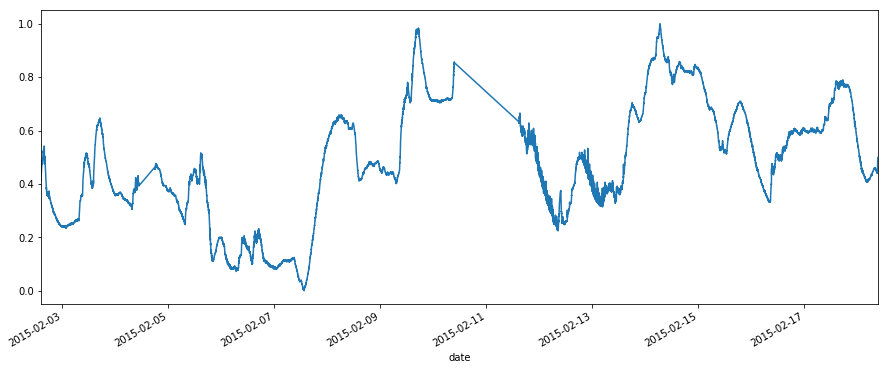

In [118]:
pdf['Humidity'].plot(figsize=(15, 6))

In [119]:
# Aggregates
pdf.groupby('Occupancy').mean() 

,Temperature,Humidity,Light,CO2,HumidityRatio
Occupancy,,,,,
0.0,0.293332,0.473842,0.014872,0.115585,0.004120
0.5,0.550604,0.497875,0.284012,0.338237,0.004589


In [132]:
# Can be done in dask too for big datasets e.g. 
ddf.groupby('Occupancy').mean().compute()

,Temperature,Humidity,Light,CO2,HumidityRatio
Occupancy,,,,,
0,20.584830,27.529653,25.237893,604.996584,0.004120
1,21.975908,28.076211,481.967368,975.321895,0.004589


In [0]:
ddf.to_parquet('data/2000-01.parquet', engine='pyarrow') # save dask dataframe as parquet

Parquet format is more space efficient than CSV and allows for faster projections and index searches

In [31]:
!ls -al data
!du -h data/2000-01.parquet

total 1480
drwxr-xr-x 3 root root   4096 May  2 13:11 .
drwxr-xr-x 1 root root   4096 May  2 10:40 ..
drwxr-xr-x 2 root root   4096 May  2 13:11 2000-01.parquet
-rw-r--r-- 1 root root 699664 Jan  5  2016 datatest2.txt
-rw-r--r-- 1 root root 200766 Jan  5  2016 datatest.txt
-rw-r--r-- 1 root root 596674 Jan  5  2016 datatraining.txt
396K	data/2000-01.parquet


In [0]:
# http://docs.dask.org/en/latest/use-cases.html
#df = dd.read_parquet('data/2000-01.parquet', engine='pyarrow')

I/O tips:

https://colab.research.google.com/notebooks/io.ipynb

In [135]:
# resample to 1 hour
ddf.resample('1h').mean().head()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:00:00,23.657118,27.023720,499.978119,898.784851,0.004889,1.000000
2015-02-02 15:00:00,23.293951,28.412430,456.719055,1103.186279,0.005030,1.000000
2015-02-02 16:00:00,22.773142,26.737452,434.838989,979.565979,0.004585,1.000000
2015-02-02 17:00:00,22.534519,24.972128,426.736145,822.562866,0.004217,0.610169
2015-02-02 18:00:00,21.993372,24.595966,32.984165,720.400269,0.004018,0.083333


In [163]:
# Daily humidity
ddf.resample('24h').mean().head() # TODO dask bug? There are more than 5 elements for sure

/usr/local/lib/python3.6/dist-packages/dask/dataframe/core.py:4553: UserWarning: Insufficient elements for `head`. 5 elements requested, only 4 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02,21.825354,24.579990,174.843216,695.649475,0.004001,0.349398
2015-02-03,21.438301,25.889320,211.852570,783.349792,0.004119,0.415972
2015-02-04,21.323767,25.422657,113.565483,571.179749,0.003997,0.183613
2015-02-05,21.469044,24.189299,196.227936,685.939514,0.003841,0.374306


In [146]:
D# Rolling windows
ddf[['Light','CO2']].rolling(window='24h').mean().head() #http://docs.dask.org/en/latest/dataframe-api.html#dask.dataframe.DataFrame.rolling

,Light,CO2
date,,
2015-02-02 14:19:00,585.200012,749.200012
2015-02-02 14:19:59,581.800018,754.800018
2015-02-02 14:21:00,578.755575,759.755575
2015-02-02 14:22:00,557.504181,763.504181
2015-02-02 14:23:00,543.723346,766.603345


In [151]:
# Effective index location access
ddf.loc['2015-02-18'].head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-18 00:00:00,20.889999,29.445000,0.0,1201.500000,0.004498,0
2015-02-18 00:01:00,20.889999,29.500000,0.0,1201.500000,0.004507,0
2015-02-18 00:02:00,20.889999,29.500000,0.0,1205.000000,0.004507,0
2015-02-18 00:03:00,20.889999,29.463333,0.0,1212.666626,0.004501,0
2015-02-18 00:04:00,20.889999,29.500000,0.0,1213.500000,0.004507,0


See: https://examples.dask.org/dataframe.html